### Quiz1

Submitted by: Fawad Kirmani

Last Modified: 09/10/2021

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1 – Load data programmatically (10 points), summarize its statistics (10 points) and report on missing data (10 points). Note that a number of parameters are reported for the same date/time in successive rows.

Load data

In [2]:
input_data = pd.read_csv('./data/WaterAtlas-OneLake.csv')  
input_data.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,...,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,2003889,Okaloacoochee Branch,WIN_21FLSFWM,32275,CRFW09,32275,26.7629,-81.4001,3235O,5/18/2020 11:11:00 AM,...,m,TN_ugl,Nitrogen,Total,1280.000,ug/l,NaN,NaN,1.280,mg/L
1,2003889,Okaloacoochee Branch,WIN_21FLSFWM,32275,CRFW09,32275,26.7629,-81.4001,3235O,5/18/2020 11:11:00 AM,...,m,NH3_N_ugl,"Nitrogen, ammonia as N",Dissolved,203.000,ug/l,NaN,NaN,0.203,mg/L
2,2003889,Okaloacoochee Branch,WIN_21FLSFWM,32275,CRFW09,32275,26.7629,-81.4001,3235O,5/18/2020 11:11:00 AM,...,m,NOx_ugl,"Nitrogen, Nitrite (NO2) + Nitrate (NO3) as N",Dissolved,9.000,ug/l,I,NaN,0.009,mg/L
3,2003889,Okaloacoochee Branch,WIN_21FLSFWM,32275,CRFW09,32275,26.7629,-81.4001,3235O,5/18/2020 11:11:00 AM,...,m,TP_ugl,Phosphorus as P,Total,52.000,ug/l,NaN,NaN,0.052,mg/L
4,2003889,Okaloacoochee Branch,WIN_21FLSFWM,32275,CRFW09,32275,26.7629,-81.4001,3235O,5/18/2020 11:11:00 AM,...,m,OP_mgl,"Phosphorus, phosphate (PO4) as P",Dissolved,0.002,mg/l,I,NaN,0.002,mg/L


As data is for single lake, removing "WBodyID", "WaterBodyName", "DataSource",	"StationID", "StationName",	"Actual_StationID", "Actual_Latitude", "Actual_Longitude", "DEP_WBID". 

Also not including for data exploration: "Sample_Fraction", "ActivityDepth", "DepthUnits", "QACode", "Original_Result_Comment", "Characteristic", "Original_Result_Unit", "Result_Unit". 

Excluding Original_Result_Value and including Result_Value as Result_Value are updated units.

In [3]:
input_data_pivot = input_data.pivot_table(columns="Parameter", 
                       index=["SampleDate", "ActivityDepth"], 
                       values="Result_Value").reset_index()
input_data_pivot

Parameter,SampleDate,ActivityDepth,24D_ugl,Ag_ugl,Al_ugl,Alk_CaCO3_mgl,As_ugl,BOD5_mgl,B_ugl,Ba_ugl,...,TN_ugl,TOC_mgl,TP_ugl,TSS_mgl,TempW_C,TempW_F,Tl_ugl,Turb_ntu,Zn_ugl,pH
0,01-11-1978 0:00,0.500000,NaN,NaN,NaN,243.0,NaN,NaN,NaN,NaN,...,464.0,NaN,20.0,NaN,16.70,62.060,NaN,NaN,NaN,7.720
1,01-11-2021 12:08,0.410000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,987.0,NaN,48.0,NaN,19.30,66.740,NaN,NaN,NaN,7.900
2,02-08-1978 0:00,0.500000,NaN,NaN,NaN,263.5,NaN,NaN,NaN,NaN,...,1301.0,NaN,14.5,NaN,15.90,60.620,NaN,NaN,NaN,7.610
3,02-08-2021 11:06,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,879.0,NaN,43.0,NaN,20.80,69.440,NaN,NaN,NaN,8.100
4,02-12-1979 0:00,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.5,NaN,16.20,61.160,NaN,NaN,NaN,7.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,9/13/1978 12:00:00 AM,0.500000,NaN,NaN,NaN,221.0,NaN,NaN,NaN,NaN,...,978.0,NaN,26.5,NaN,29.70,85.460,NaN,NaN,NaN,7.500
99,9/16/1980 12:00:00 AM,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1660.0,NaN,131.0,NaN,27.60,81.680,NaN,NaN,NaN,7.230
100,9/19/2013 12:00:00 AM,0.152439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27.26,81.068,NaN,NaN,NaN,7.445
101,9/20/2016 12:00:00 AM,0.300000,NaN,NaN,NaN,NaN,1.78,NaN,NaN,NaN,...,1210.0,22.0,170.0,6.0,28.00,82.400,NaN,3.5,NaN,7.200


In [4]:
input_data_pivot.rename(columns={'Sucralose_ug/l':'Sucralose_ugl'}, inplace=True)

summarizing statistics of input_data_pivot dataframe

In [5]:
summary = input_data_pivot.describe()
print(summary.columns)
summary

Index(['ActivityDepth', '24D_ugl', 'Ag_ugl', 'Al_ugl', 'Alk_CaCO3_mgl',
       'As_ugl', 'BOD5_mgl', 'B_ugl', 'Ba_ugl', 'C_organic_mgl', 'Ca_diss_mgl',
       'Ca_mgl', 'CarbAlk_mgl', 'Cd_ugl', 'ChlaC_ugl', 'Chla_ugl',
       'Cl_diss_mgl', 'Cl_mgl', 'Color_true_pcu', 'Cond_umhocm', 'Cr_ugl',
       'Cu_diss_ugl', 'Cu_ugl', 'DO_mgl', 'DO_percent', 'Depth_bott_ft',
       'Diuron_ugl', 'Ecoli_100ml', 'Endothall_ugl', 'F_mgl', 'Fe_diss_ugl',
       'Fe_ugl', 'Glyphosate_ugl', 'Hardnesscarbonate_mgl', 'K_mgl',
       'Linuron_ugl', 'MCPP_ugl', 'Mg_diss_mgl', 'Mg_mgl', 'Mn_diss_ugl',
       'Mn_ugl', 'NH3_N_diss_ugl', 'NH3_N_ugl', 'NO2_diss_ugl', 'NO3_diss_ugl',
       'NOx_ugl', 'Na_diss_mgl', 'Na_mgl', 'Ni_ugl', 'OP_mgl', 'Pb_ugl',
       'Pheo_ugl', 'SO4_diss_mgl', 'SO4_mgl', 'Salinity_PSS', 'Salinity_ppt',
       'Sb_ugl', 'Se_ugl', 'Secchi_ft', 'Si_ugl', 'Sucralose_ugl', 'TDS_mgl',
       'TKN_ugl', 'TN_ugl', 'TOC_mgl', 'TP_ugl', 'TSS_mgl', 'TempW_C',
       'TempW_F', 'Tl_ugl', 'Turb

Parameter,ActivityDepth,24D_ugl,Ag_ugl,Al_ugl,Alk_CaCO3_mgl,As_ugl,BOD5_mgl,B_ugl,Ba_ugl,C_organic_mgl,...,TN_ugl,TOC_mgl,TP_ugl,TSS_mgl,TempW_C,TempW_F,Tl_ugl,Turb_ntu,Zn_ugl,pH
count,103.000000,5.000000,19.00,6.000000,34.000000,25.000000,1.0,6.000000,6.000000,19.000000,...,72.000000,6.000000,94.000000,25.000000,95.000000,95.000000,6.000000e+00,25.000000,21.000000,95.000000
mean,0.385385,0.070100,0.01,28.833333,230.823529,2.137200,1.0,72.700000,18.466667,15.842105,...,1175.430556,16.666667,61.132979,5.840000,25.890333,78.602600,1.000000e-01,6.344000,10.190476,7.557158
std,0.146083,0.128781,0.00,13.556056,33.442597,0.500995,NaN,10.409611,1.155278,3.905312,...,427.584135,4.366539,50.033547,4.209909,4.203510,7.566317,1.520235e-17,3.446264,18.861652,0.336734
min,0.100000,0.002000,0.01,11.000000,113.000000,1.410000,1.0,57.900000,16.900000,10.000000,...,420.000000,11.000000,8.000000,2.000000,15.900000,60.620000,1.000000e-01,2.900000,5.000000,6.790000
25%,0.290000,0.008500,0.01,20.250000,205.750000,1.780000,1.0,66.900000,17.850000,12.500000,...,925.000000,13.250000,23.625000,3.000000,23.350000,74.030000,1.000000e-01,4.000000,5.000000,7.320000
50%,0.500000,0.016000,0.01,30.000000,240.000000,2.080000,1.0,73.100000,18.500000,15.000000,...,1092.500000,17.500000,48.500000,5.000000,26.900000,80.420000,1.000000e-01,5.200000,5.000000,7.500000
75%,0.500000,0.024000,0.01,34.500000,250.000000,2.430000,1.0,78.025000,18.850000,17.500000,...,1303.250000,19.500000,82.000000,7.000000,28.993333,84.188000,1.000000e-01,8.000000,5.000000,7.800000
max,0.500000,0.300000,0.01,49.000000,289.000000,3.480000,1.0,87.600000,20.300000,24.000000,...,2734.000000,22.000000,264.000000,22.000000,32.400000,90.320000,1.000000e-01,18.000000,89.000000,8.300000


Not every parameter is measured on every date the survey of water is conducted.

In [6]:
input_data_pivot.isnull()

Parameter,SampleDate,ActivityDepth,24D_ugl,Ag_ugl,Al_ugl,Alk_CaCO3_mgl,As_ugl,BOD5_mgl,B_ugl,Ba_ugl,...,TN_ugl,TOC_mgl,TP_ugl,TSS_mgl,TempW_C,TempW_F,Tl_ugl,Turb_ntu,Zn_ugl,pH
0,False,False,True,True,True,False,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
1,False,False,True,True,True,True,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
2,False,False,True,True,True,False,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
3,False,False,True,True,True,True,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,False,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,False,False,True,True,True,False,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
99,False,False,True,True,True,True,True,True,True,True,...,False,True,False,True,False,False,True,True,True,False
100,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,False
101,False,False,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,True,False,True,False


Percentage of missing values in each parameter

In [7]:
for i in range(len(input_data_pivot.columns)):
    missing_data = input_data_pivot[input_data_pivot.columns[i]].isna().sum()
    perc = missing_data / len(input_data_pivot) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 98, percentage 95.15
>3,  missing entries: 84, percentage 81.55
>4,  missing entries: 97, percentage 94.17
>5,  missing entries: 69, percentage 66.99
>6,  missing entries: 78, percentage 75.73
>7,  missing entries: 102, percentage 99.03
>8,  missing entries: 97, percentage 94.17
>9,  missing entries: 97, percentage 94.17
>10,  missing entries: 84, percentage 81.55
>11,  missing entries: 71, percentage 68.93
>12,  missing entries: 78, percentage 75.73
>13,  missing entries: 97, percentage 94.17
>14,  missing entries: 84, percentage 81.55
>15,  missing entries: 78, percentage 75.73
>16,  missing entries: 63, percentage 61.17
>17,  missing entries: 59, percentage 57.28
>18,  missing entries: 78, percentage 75.73
>19,  missing entries: 35, percentage 33.98
>20,  missing entries: 6, percentage 5.83
>21,  missing entries: 79, percentage 76.70
>22,  missing entries: 90, percentage 87.38
>23

Heatmap of missing values in each parameter/column

<AxesSubplot:xlabel='Parameter'>

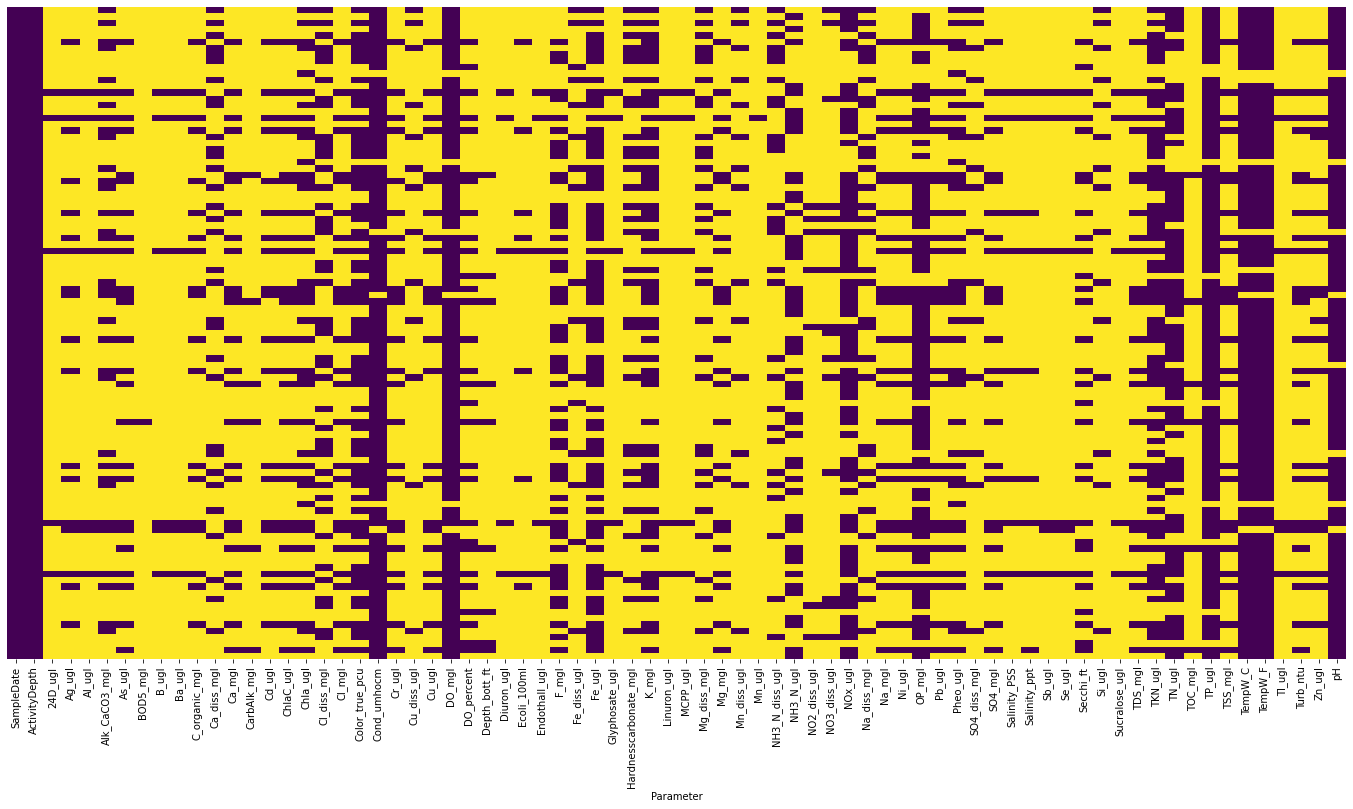

In [8]:
plt.rcParams["figure.figsize"] = [24, 12]
sns.heatmap(input_data_pivot.isna(), cbar=False, cmap='viridis', yticklabels=False)

From above figure, we can observe there are lot of missing data in every column except "SampleDate" and "ActivityDepth" which have no missing value.

#### Task 2 - Create plots for all the parameters with X-axis showing time and Y-axis showing the parameter value. 

In [9]:
plt.style.use('classic')
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

Saving plots in plots folder.

In [10]:
input_data_pivot.set_index('SampleDate',inplace=True)
for i, col in enumerate(input_data_pivot.columns):
    input_data_pivot[col].plot(fig=plt.figure(i))
    plt.ion()
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('./plots/'+str(col)+'.png', dpi=300)
    plt.close()

#### Task 3 – List at least 3 feature pairs with strong correlations (> 0.5 or <-0.5) among them? Show heatmap of correlation, if possible. What does this indicate?

##### Correlation Heatmap

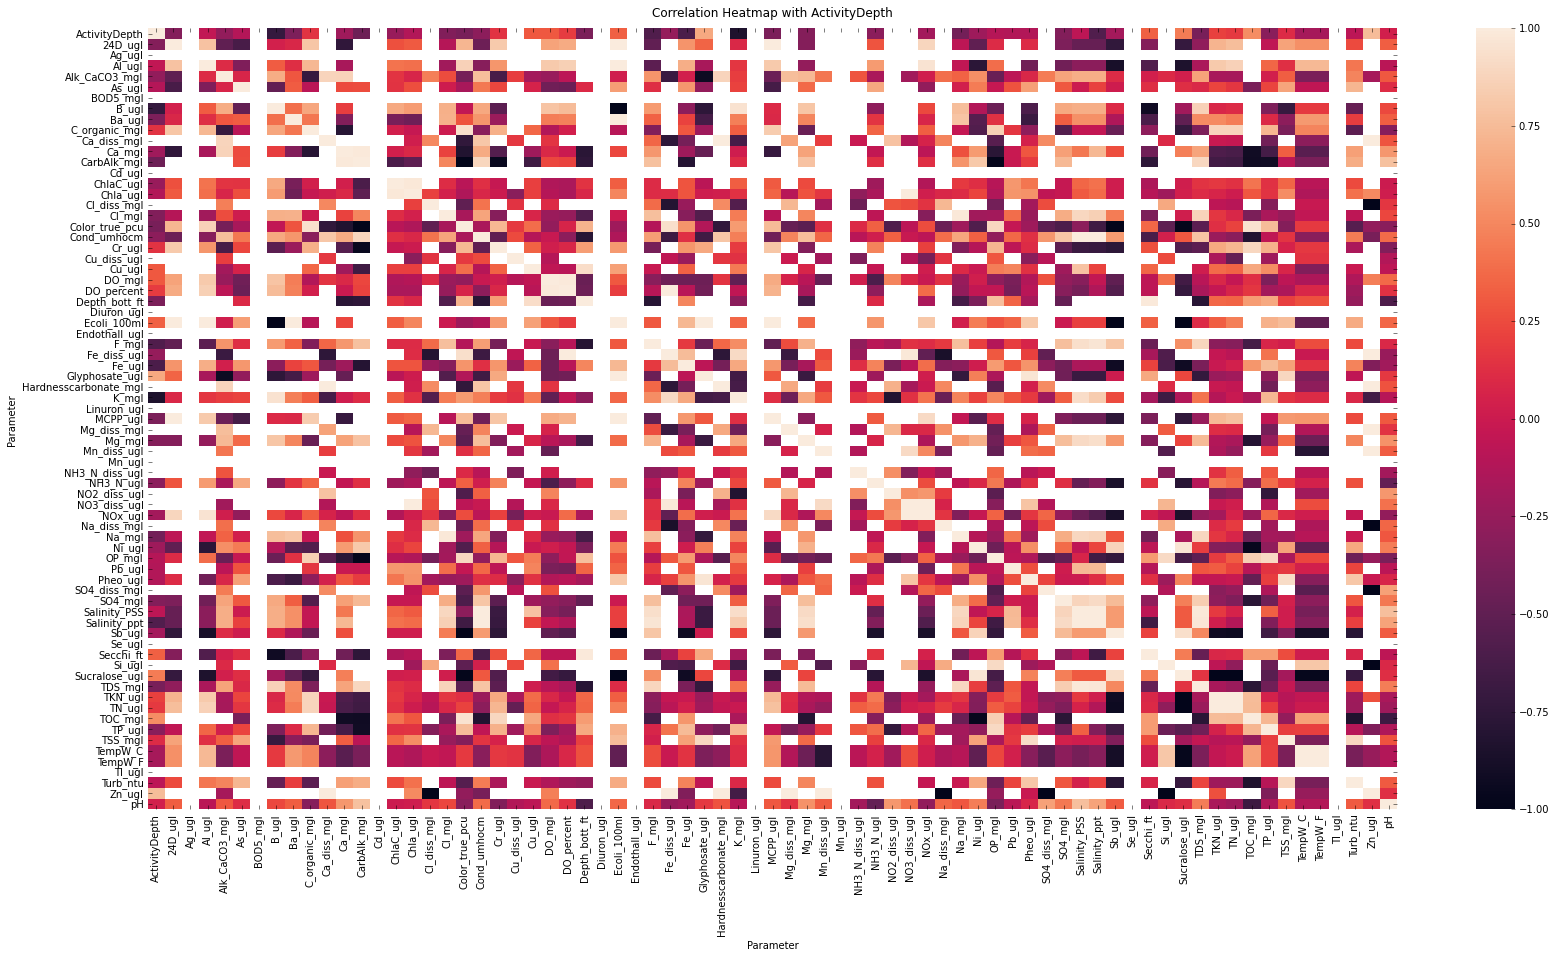

In [22]:
corr1 = input_data_pivot.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [28, 14]
heatmap = sns.heatmap(corr1)
heatmap.set_title('Correlation Heatmap with ActivityDepth', fontdict={'fontsize':12}, pad=12);

Two Highest correlation: One is self and other is with different feature. We are concenred with other features not same feature for correlation.

In [100]:
corr1.reset_index()
for i, col in enumerate(corr1.columns):
    try:
        top = pd.DataFrame(corr1[(corr1[col]>0.9) | (corr1[col]<-0.9)][col].nlargest(2).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

     Parameter  24D_ugl
0  Ecoli_100ml      1.0


     Parameter  Al_ugl
0  Ecoli_100ml     1.0


        Parameter  Alk_CaCO3_mgl
1  Glyphosate_ugl      -0.925814


  Parameter     B_ugl
1     K_mgl  0.950117


     Parameter  Ba_ugl
0  Ecoli_100ml     1.0


        Parameter  C_organic_mgl
1  Color_true_pcu       0.939544


  Parameter  Ca_diss_mgl
1    Zn_ugl          1.0


     Parameter    Ca_mgl
1  CarbAlk_mgl  0.990536


  Parameter  CarbAlk_mgl
1    Ca_mgl     0.990536


  Parameter  ChlaC_ugl
1  Chla_ugl   0.976938


      Parameter  Chla_ugl
1  NO3_diss_ugl   0.99939


  Parameter  Cl_diss_mgl
1    Zn_ugl         -1.0


  Parameter    Cl_mgl
1    Na_mgl  0.983395


  Parameter  Color_true_pcu
1   TOC_mgl         0.94758


      Parameter  Cond_umhocm
1  Salinity_ppt     0.999392


     Parameter    Cr_ugl
1  CarbAlk_mgl -0.958928


       Parameter    Cu_ugl
1  Depth_bott_ft  0.926694


    Parameter    DO_mgl
1  DO_percent  0.988709


     Parameter  DO_percent
1  Fe_diss_ug

Top three correlated feature pairs are when considering ActivityDepth:

    1. Ecoli_100ml and Al_ugl
    2. Zn_ugl and Si_ugl
    3. DO_percent and Fe_diss_ugl

In [102]:
# Imputing missing values
# imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
# for i in range(len(input_data_pivot_drop_activitydepth.columns)):
#     input_data_pivot_drop_activitydepth[input_data_pivot_drop_activitydepth.columns[i]] = imputer.fit_transform(input_data_pivot_drop_activitydepth[input_data_pivot_drop_activitydepth.columns[i]].values.reshape(-1,1))[:,0]

# input_data_pivot_drop_activitydepth

#### Task 4 – If you are a resident living near this location and looking at this water data. You want to know answers for questions like if it safe to go to swim in the water, use water to irrigate your garden or event drink from it? Can this data answer any such questions? Discuss.

.

If I am residing near this location, I would be interested to know:

    1. The pH value of the water, tells the acidic level of water.
    2. The amount of dissolved calcium and magnesium in the water, it defines the hardness of water.
    3. The temperature of the water. It affects fish and aquatic plants in the water.
    5. Salinity of water
    6. Turbidity of water
    7. Alkalinity of water
    8. Dissolved oxygen content in water
    9. Phosporius and Nirtrogen content of water.
    
Basically, by looking at this I want to know the quality of the water before using it to drink, cook food, swimming, fishing, etc. As the contains the parameters I will mostly be interested in to know, I think I will able to judge the quality of water in this location.